In [4]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [6]:
dataset = MNIST(root="", download=True)

In [7]:
len(dataset)

60000

In [8]:
test_dataset = MNIST(root='', train=False)
len(test_dataset)

10000

In [10]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F60D190C7D0>, 5)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


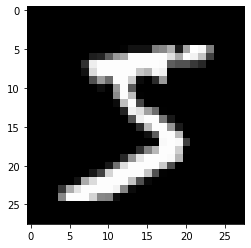

In [12]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


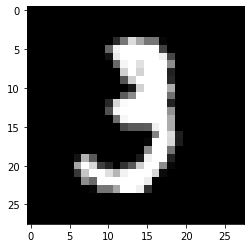

In [13]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

It's evident that these images are quite small in size, and recognizing the digits can sometimes be hard even for the human eye. While it's useful to look at these images, there's just one problem here: PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.

In [14]:
import torchvision.transforms as transforms

In [15]:
# MNIST dataset (images and labels)
dataset = MNIST(root='', 
                train=True,
                transform=transforms.ToTensor())

In [17]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
#pIL image convert into pytorch 
# 1 os color channel
# 28 28 is height width

torch.Size([1, 28, 28]) 5


In [18]:
print(img_tensor[:,10:15,10:15])

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


In [21]:
print(torch.max(img_tensor),torch.min(img_tensor))

tensor(1.) tensor(0.)


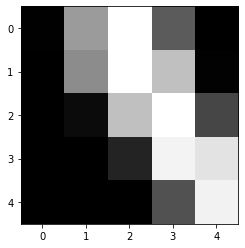

In [22]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

# Training and Validation Datasets
While building real world machine learning models, it is quite common to split the dataset into 3 parts:

- Training set - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
- Validation set - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
- Test set - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

In [23]:
def split_indics(n,val_pct):
    n_val = int(val_pct*n)
    idx = np.random.permutation(n)
    return idx[n_val:] , idx[:n_val]

In [25]:
train_ind , val_ind = split_indics(len(dataset),val_pct=0.2)

<IPython.core.display.Javascript object>

In [26]:
print(len(train_ind),len(val_ind))

48000 12000


In [28]:
# we use SubsetRandomSampler coz it samples elemnt randomly from given list of indices

In [27]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [29]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_ind)
train_loader = DataLoader(dataset,
                         batch_size,
                         sampler=train_sampler)


val_sampler = SubsetRandomSampler(val_ind)
val_loader = DataLoader(dataset,
                         batch_size,
                         sampler=val_sampler)

In [31]:
import torch.nn as nn 

input_size = 28*28
num_class = 10 

model = nn.Linear(input_size,num_class)

In [33]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0223,  0.0120, -0.0060,  ...,  0.0018, -0.0001,  0.0285],
        [-0.0117, -0.0101,  0.0013,  ..., -0.0065, -0.0263, -0.0274],
        [ 0.0236,  0.0319,  0.0224,  ...,  0.0142, -0.0144,  0.0100],
        ...,
        [-0.0308,  0.0123,  0.0150,  ...,  0.0009,  0.0166, -0.0205],
        [-0.0238,  0.0110, -0.0071,  ...,  0.0300, -0.0310,  0.0126],
        [ 0.0335, -0.0231, -0.0012,  ...,  0.0244, -0.0318, -0.0290]],
       requires_grad=True)

In [34]:
for img,label in train_loader:
    print(label)
    print(img.shape)
    output = model(img)
    break

tensor([5, 0, 3, 4, 2, 1, 2, 7, 3, 8, 5, 5, 1, 5, 6, 6, 2, 9, 6, 5, 0, 0, 4, 9,
        2, 4, 1, 0, 9, 6, 1, 4, 2, 4, 5, 1, 8, 4, 2, 5, 6, 5, 7, 6, 3, 8, 3, 6,
        4, 2, 7, 9, 7, 2, 2, 4, 4, 3, 9, 3, 5, 4, 8, 7, 9, 7, 8, 7, 1, 1, 1, 4,
        7, 7, 1, 2, 4, 5, 5, 7, 3, 2, 3, 1, 6, 9, 3, 5, 7, 5, 8, 8, 4, 0, 2, 8,
        4, 4, 8, 0])
torch.Size([100, 1, 28, 28])


RuntimeError: size mismatch, m1: [2800 x 28], m2: [784 x 10] at /opt/conda/conda-bld/pytorch_1591914855613/work/aten/src/TH/generic/THTensorMath.cpp:41

In [36]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_class)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [37]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0024,  0.0062, -0.0023,  ..., -0.0043, -0.0196, -0.0186],
         [-0.0180,  0.0329,  0.0041,  ...,  0.0006, -0.0080,  0.0002],
         [-0.0161,  0.0117, -0.0330,  ..., -0.0191, -0.0137,  0.0297],
         ...,
         [ 0.0115, -0.0069, -0.0261,  ...,  0.0316,  0.0084,  0.0294],
         [ 0.0283, -0.0100, -0.0216,  ...,  0.0001, -0.0305, -0.0323],
         [ 0.0324, -0.0333,  0.0108,  ...,  0.0165, -0.0031, -0.0200]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0199,  0.0129,  0.0152,  0.0004,  0.0256,  0.0165, -0.0006, -0.0344,
          0.0049, -0.0263], requires_grad=True)]

In [38]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)

outputs.shape :  torch.Size([100, 10])


In [39]:
 import torch.nn.functional as F 

In [40]:
probs = F.softmax(outputs,dim=1)

In [43]:
probs[:2].data


tensor([[0.1087, 0.0898, 0.1093, 0.1173, 0.0972, 0.0861, 0.0700, 0.0920, 0.1021,
         0.1275],
        [0.1552, 0.0996, 0.0940, 0.0957, 0.1015, 0.0796, 0.0832, 0.0952, 0.1021,
         0.0939]])

In [44]:
max_pred,preds = torch.max(probs,dim=1)
print(preds)
print(max_pred)

tensor([9, 0, 0, 1, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
        0, 0, 0, 8, 8, 9, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 1, 0, 0, 6, 6, 0, 9,
        0, 0, 0, 0, 0, 0, 3, 7, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 9, 0, 0, 0, 0, 6, 0, 9, 0, 8, 6, 0, 6, 9, 0, 0, 4, 2, 0, 0,
        5, 0, 0, 0])
tensor([0.1275, 0.1552, 0.1483, 0.1231, 0.1327, 0.1883, 0.1282, 0.1372, 0.1339,
        0.1397, 0.1548, 0.1564, 0.1243, 0.1136, 0.1622, 0.1204, 0.1289, 0.1584,
        0.1382, 0.1617, 0.1434, 0.1380, 0.1405, 0.1465, 0.1752, 0.1464, 0.1400,
        0.1284, 0.1305, 0.1303, 0.1736, 0.1574, 0.1585, 0.1295, 0.1096, 0.1231,
        0.1913, 0.1425, 0.1268, 0.1337, 0.1786, 0.1185, 0.1701, 0.1678, 0.1292,
        0.1467, 0.1472, 0.1432, 0.1546, 0.1207, 0.1696, 0.1231, 0.1589, 0.1498,
        0.1175, 0.1161, 0.1375, 0.1405, 0.1293, 0.1630, 0.1308, 0.1273, 0.1339,
        0.1255, 0.1528, 0.1362, 0.1424, 0.1608, 0.1694, 0.1340, 0.1500, 0.1548,
        0.1294, 0.1

In [45]:
label

tensor([5, 0, 3, 4, 2, 1, 2, 7, 3, 8, 5, 5, 1, 5, 6, 6, 2, 9, 6, 5, 0, 0, 4, 9,
        2, 4, 1, 0, 9, 6, 1, 4, 2, 4, 5, 1, 8, 4, 2, 5, 6, 5, 7, 6, 3, 8, 3, 6,
        4, 2, 7, 9, 7, 2, 2, 4, 4, 3, 9, 3, 5, 4, 8, 7, 9, 7, 8, 7, 1, 1, 1, 4,
        7, 7, 1, 2, 4, 5, 5, 7, 3, 2, 3, 1, 6, 9, 3, 5, 7, 5, 8, 8, 4, 0, 2, 8,
        4, 4, 8, 0])

# Loss and Evaluation Metric

In [47]:
torch.sum(label == preds).item() / len(label)

0.05

In [46]:
def accuracy(l1,l2):
    return torch.sum(l1==l2).item()/len(l1)

In [50]:
accuracy(preds,label)

0.05